In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale, minmax_scale, power_transform
from sklearn.linear_model import LinearRegression


In [ ]:
%pip install ploty
%pip install cufflinks
%pip install chart-studio

ERROR: Could not find a version that satisfies the requirement ploty (from versions: none)
ERROR: No matching distribution found for ploty


In [ ]:
# Lendo a base de dados
base_investimento = pd.read_csv('/content/MKT.csv')

In [ ]:
base_investimento.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# verificando as caracteristicas e analisando se existem valores nulos
base_investimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
# Analisando métricas e valores
base_investimento.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
# Encontrado um outlier na base de dados
var_outlier = base_investimento.query('sales <2')
display(var_outlier)
var_outlier =  base_investimento.query('sales <2').index

,youtube,facebook,newspaper,sales
101,0.84,47.52,10.44,1.92


In [ ]:
base_investimento.drop(var_outlier, inplace= True)

In [ ]:
# verficando novamente com o describe
base_investimento.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
# Sem valores duplicados
base_investimento[base_investimento.duplicated(keep=False)]

,youtube,facebook,newspaper,sales


# Continuando a Análise e compreendendo o dataset - Análise Exploratória

In [ ]:
# verficando novamente com o describe
base_investimento.describe()

,youtube,facebook,newspaper,sales
count,170.000000,170.000000,170.000000,170.000000
mean,179.063294,27.554824,35.385882,17.011059
std,101.838967,17.901077,24.903096,6.226598
min,4.920000,0.000000,0.360000,3.840000
25%,91.590000,11.610000,14.430000,12.600000
50%,183.840000,26.400000,31.380000,15.660000
75%,263.370000,43.410000,51.240000,20.850000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
# Mostrando de forma gráfica o describe
fig = px.box(base_investimento, x ='sales')
fig.update_traces(line_color ='blue')

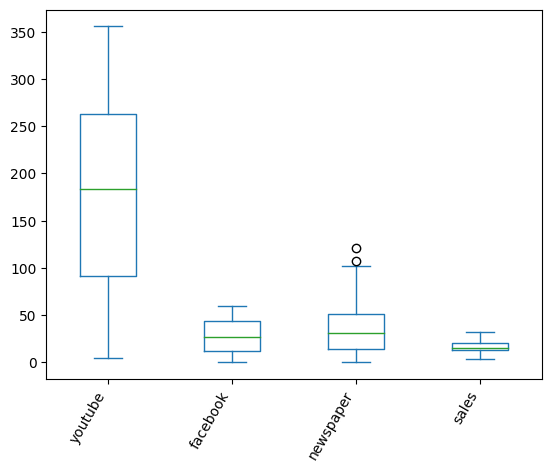

In [ ]:
# Box plot com todas as colunas
base_investimento.plot.box()
plt.xticks(rotation=60, ha='right');

##--Analiado que o youtube é o maior investimento que está sendo feito

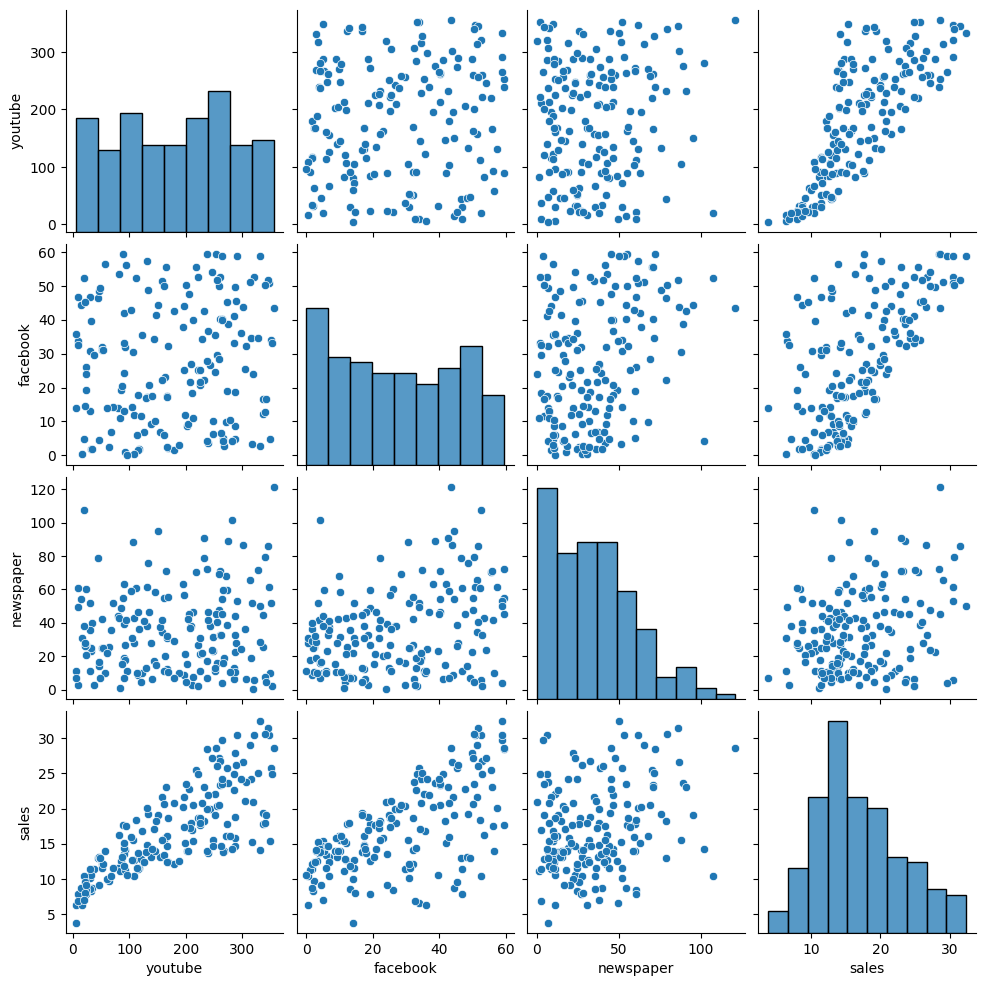

In [ ]:
# Plotando todos os gráficos das relações entre as colunas
sns.pairplot(base_investimento)

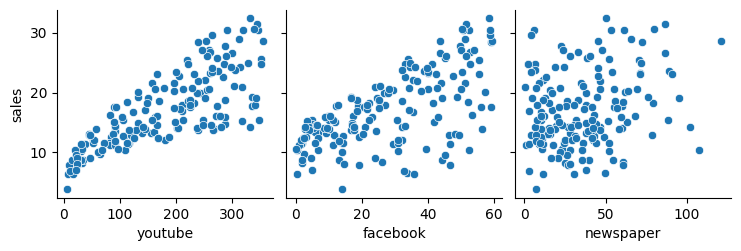

In [ ]:
# comparação somente com o preço
sns.pairplot(base_investimento, x_vars=['youtube', 'facebook', 'newspaper'], y_vars ='sales')

# Em uma primeira analise posso identificar que o youtube precisa de muito mais investimento que os demais para conseguir resultados parecidos

<Axes: >

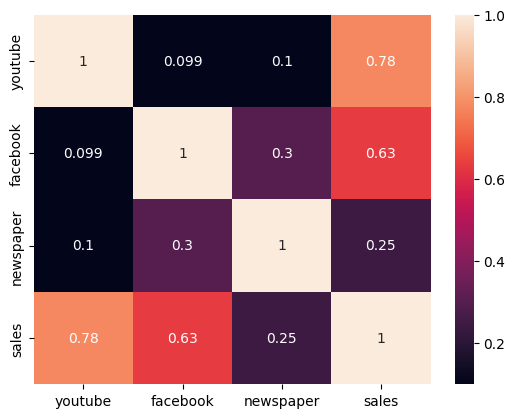

In [ ]:
sns.heatmap(base_investimento.corr(), annot= True)

<Axes: xlabel='sales', ylabel='Count'>

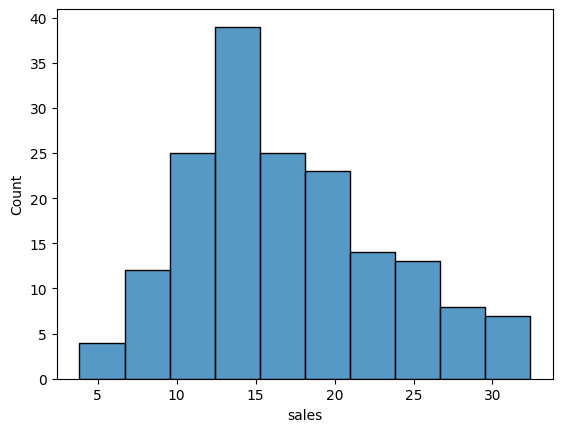

In [ ]:
sns.histplot(base_investimento['sales'])

<Axes: >

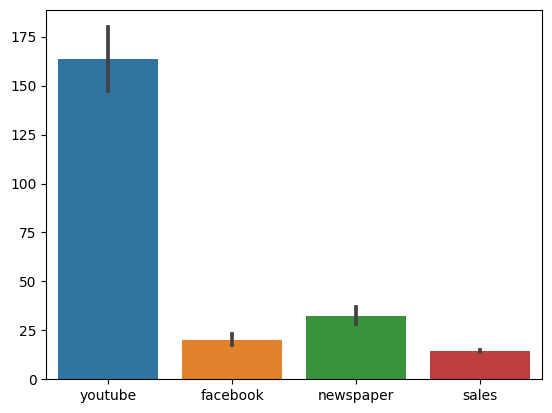

In [ ]:
intervalo_media= base_investimento.query('sales>10 and sales<20')
sns.barplot(intervalo_media)

#Modelagem


In [ ]:
base_investimento.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [ ]:
# Separando os tipos de variáveis
x = base_investimento[['youtube', 'facebook', 'newspaper']]

y = base_investimento[['sales']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Separando em treino e teste e colocando o tamanho em 70%
x_train, x_teste, y_train, y_teste = train_test_split(x, y, train_size= 0.7, random_state= 42)

In [ ]:
print(x_train.shape)
print(x_teste.shape)
print(y_train.shape)
print(y_teste.shape)

(118, 3)
(52, 3)
(118, 1)
(52, 1)


In [ ]:
lm = LinearRegression()

In [ ]:
# Treinando o modelo
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
# tentar predizer o x_teste
y_pred = lm.predict(x_teste)

In [ ]:
# Calculando o r^2
r  = r2_score(y_teste, y_pred)
print(r)

0.9059271486445383


#Plotando os resultados - Calculando predição

Text(0, 0.5, 'Preço')

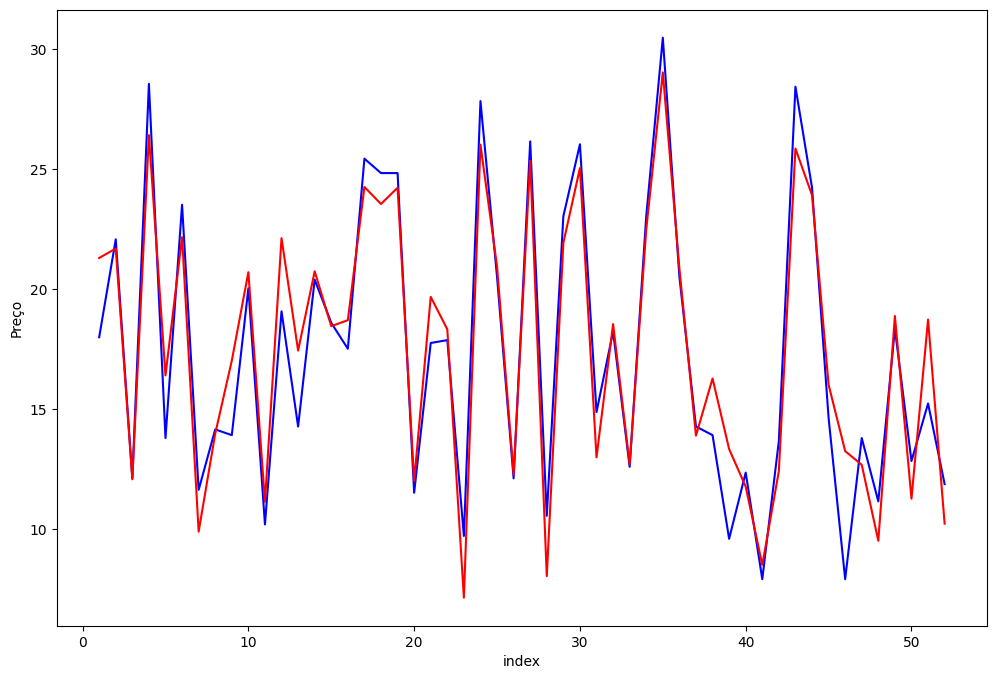

In [ ]:
# Aqui estamos tentando mostrar aquilo que foi previsto pelo modelo de regressão linear
# Podemos ver que muitas das quedas e altas acompanham aquilo que vemos na base de dados

c = [i for i in range(1, 53,1)]
fig = plt.figure(figsize=(12,8))
plt.plot(c, y_teste, color='blue')

plt.plot(c, y_pred, color='red')

plt.xlabel("index")
plt.ylabel('Preço')

#Previsões

Vamos passar parametros e ver como o modelo nos retorna esses valores e entender como podemos retirar novas conclusões sobre


Cenários:

1.   Youtube com 100 de investimento
2.   Facebook com 100 de investimento
3.   Newspaper com 100 de investimento
4.   todos 100 de investimento

Obs: será levado em consideração a média para os outros valores





In [ ]:
base_investimento.describe()

,youtube,facebook,newspaper,sales
count,170.000000,170.000000,170.000000,170.000000
mean,179.063294,27.554824,35.385882,17.011059
std,101.838967,17.901077,24.903096,6.226598
min,4.920000,0.000000,0.360000,3.840000
25%,91.590000,11.610000,14.430000,12.600000
50%,183.840000,26.400000,31.380000,15.660000
75%,263.370000,43.410000,51.240000,20.850000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
# Cenário Atual / padrão
youtube = 179
facebook = 27
newspaper = 35

entrada_valores = [[youtube, facebook, newspaper]]

# Prevendo valores do Preço
Valor_sales = lm.predict(entrada_valores)[0]
print(Valor_sales)

[16.93779977]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
# Cenário 1
youtube = 100
facebook = 27
newspaper = 35

entrada_valores = [[youtube, facebook, newspaper]]

# Prevendo valores do Preço
Valor_sales = lm.predict(entrada_valores)[0]
print(Valor_sales)

[13.43370837]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
# Cenário 2
youtube = 179
facebook = 100
newspaper = 35

entrada_valores = [[youtube, facebook, newspaper]]

# Prevendo valores do Preço
Valor_sales = lm.predict(entrada_valores)[0]
print(Valor_sales)

[30.7586163]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
# Cenário 3
youtube = 179
facebook = 27
newspaper = 100

entrada_valores = [[youtube, facebook, newspaper]]

# Prevendo valores do Preço
Valor_sales = lm.predict(entrada_valores)[0]
print(Valor_sales)

[17.23175432]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
# Cenário 4
youtube = 100
facebook = 100
newspaper = 100

entrada_valores = [[youtube, facebook, newspaper]]

# Prevendo valores do Preço
Valor_sales = lm.predict(entrada_valores)[0]
print(Valor_sales)

[27.54847945]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



# Analisando em proporção

Analise pensando no proporção dos valores investidos em relações a média
vai ser usado 125% da media

Cenarios:


1.   youtube com 125% da media
2.   facebook com 125% da media
3.   newspaper com 125% da media



In [ ]:
base_investimento.describe()

,youtube,facebook,newspaper,sales
count,170.000000,170.000000,170.000000,170.000000
mean,179.063294,27.554824,35.385882,17.011059
std,101.838967,17.901077,24.903096,6.226598
min,4.920000,0.000000,0.360000,3.840000
25%,91.590000,11.610000,14.430000,12.600000
50%,183.840000,26.400000,31.380000,15.660000
75%,263.370000,43.410000,51.240000,20.850000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
# Cenário 1
perc_maior =125
perc_media =100
valor_media =179

valor_maior =  (perc_maior*valor_media)/perc_media

youtube = valor_maior
facebook = 27
newspaper = 100

entrada_valores = [[youtube, facebook, newspaper]]

# Prevendo valores do Preço
Valor_sales = lm.predict(entrada_valores)[0]
print(Valor_sales)

[19.21666685]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
# Cenário 2
perc_maior =125
perc_media =100
valor_media =27

valor_maior =  (perc_maior*valor_media)/perc_media

youtube = 179
facebook = valor_maior
newspaper = 100

entrada_valores = [[youtube, facebook, newspaper]]

# Prevendo valores do Preço
Valor_sales = lm.predict(entrada_valores)[0]
print(Valor_sales)

[18.50970654]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
# Cenário 3
perc_maior =125
perc_media =100
valor_media =35

valor_maior =  (perc_maior*valor_media)/perc_media

youtube = 179
facebook = 27
newspaper = valor_maior

entrada_valores = [[youtube, facebook, newspaper]]

# Prevendo valores do Preço
Valor_sales = lm.predict(entrada_valores)[0]
print(Valor_sales)

[16.97737057]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



#Conclusão

**1- Visão geral do dataset e as relações encontradas:**

- Foi observado que todos os investimentos resultaram em crescimento das vendas.
- Os investimentos mostraram boa correlação com a coluna de vendas.
- Houve pouca necessidade de intervenção na qualidade dos dados, porém um outlier foi removido.



**2 - Analise dos dados e resultados:**

- Todos os investimentos demonstraram relação com as vendas, sendo o YouTube o maior investimento dos três, representando a maior parte do valor investido nesse setor.
- Uma regressão linear foi realizada, resultando em um R^2 de 0.9059271486445383.


**3 - Analise da predição:**
- Diferentes cenários foram gerados, cada um demonstrando resultados de vendas diferentes, permitindo a determinação do melhor investimento.
- YouTube: A plataforma detém o maior valor investido, porém requer um investimento considerável para gerar retorno. Comparativamente, ao alocar uma verba de 100, o YouTube gera um retorno de 13.43, enquanto o Facebook alcança 30.75 em retorno.
- Facebook: É a plataforma que oferece o melhor retorno com o mesmo valor investido.
- Newspaper: Gera retorno com o investimento, mas aumentar o valor aplicado resulta em pouco retorno adicional.


Em resumo, para essa empresa de marketing, o maior investimento é o YouTube. No entanto, é necessário um investimento substancial para obter retorno. Por outro lado, o Facebook oferece um retorno consideravelmente maior com o mesmo investimento, cerca de 43% a mais. O Newspaper proporciona retorno no investimento, mas o aumento do valor aplicado resulta em ganhos mínimos. Com isso, é possível afirmar que o melhor investimento para essa empresa é o Facebook, já que oferece retornos muito satisfatórios e elevados em comparação às outras opções, com valores que as outras alternativas exigiriam muito mais para alcançar.
